---
---

# <center><font color='black'>The Hodgkin-Huxley Model</font></center> <a class="tocSkip">
    
### <center><font color='black'>Nicolai Haug</font></center> <a class="tocSkip">
    
### <center><font color='black'>2021</font></center> <a class="tocSkip">
    
---
---

# Table of Contents <a class="tocSkip">

* [Introduction](#introduction)
    * [Configure Notebook](#configure) 
* [Action Potentials](#ap)
* [The Hodgkin-Huxley Model](#hh)
* [Spiking Features](#features)

# Introduction <a name="introduction"></a> 

In this chapter we go briefly through the physiology and physics of biological brains.



## Configure Notebook <a name="configure"></a>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        Run the cell below to configure the notebook. 
    </p>
<div>
</div>
</div>

In [1]:
import os
import sys


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from IPython.display import display
from latex_envs.latex_envs import figcaption 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
#plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Action Potentials <a name="ap"></a> 

todo

# The Hodgkin-Huxley Model <a name="hh"></a> 

From a biophysical point of view, action potentials are the result of currents that pass through ion channels in the cell membrane. In an extensive series of experiments on the giant axon of the squid, Hodgkin and Huxley succeeded to measure these currents and to describe their dynamics in terms of differential equations.


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; Hodgkin-Huxley Model</b><br>
<div>

\begin{eqnarray}
    C\frac{dV}{dt} &=& I - \bar g_{K^+} n^4 (V - E_{K^+}) - \bar g_{Na^+} m^3 h(V - E_{Na^+} ) - g_L (V - E_L)
    \\ 
    \frac{dn}{dt} &=& \frac{n_\infty (V) - n}{\tau_n (V)} 
    \\
    \frac{dm}{dt} &=& \frac{m_\infty (V) - m}{\tau_m(V)} 
    \\
    \frac{dh}{dt} &=&  \frac{h_\infty (V) - h}{\tau_h (V)}
\end{eqnarray}

</div>
</div>

It is convenient to rewrite the last three equations in the form

\begin{equation}
    \frac{dx}{dt} = \alpha_x(V)(1 - x) - \beta_x (V )x  \qquad \mbox{where} \ x \in \{n, m, h\}.
\end{equation}

The coefficients $\alpha_x (V )$ and $\beta_x (V )$ represent the (voltage-dependent) activation and inactivation rates, respectively, for the gate $x$. With these coefficients, the steady-state activation variables $x_\infty(V )$ and the time constants $\tau_x(V )$ in the Hodgkin-Huxley equations are given by

\begin{equation*}
    x_\infty (V) = \frac{\alpha_x (V)}{\alpha_x (V) + \beta_x (V)}
\end{equation*}

and

\begin{equation*}
    \tau_x (V ) = \frac {1}{\alpha_x (V) + \beta_x(V)}.
\end{equation*}

## The Hodgkin-Huxley Solver 

A simple example using the `pylfi.models.HodgkinHuxley` solver:

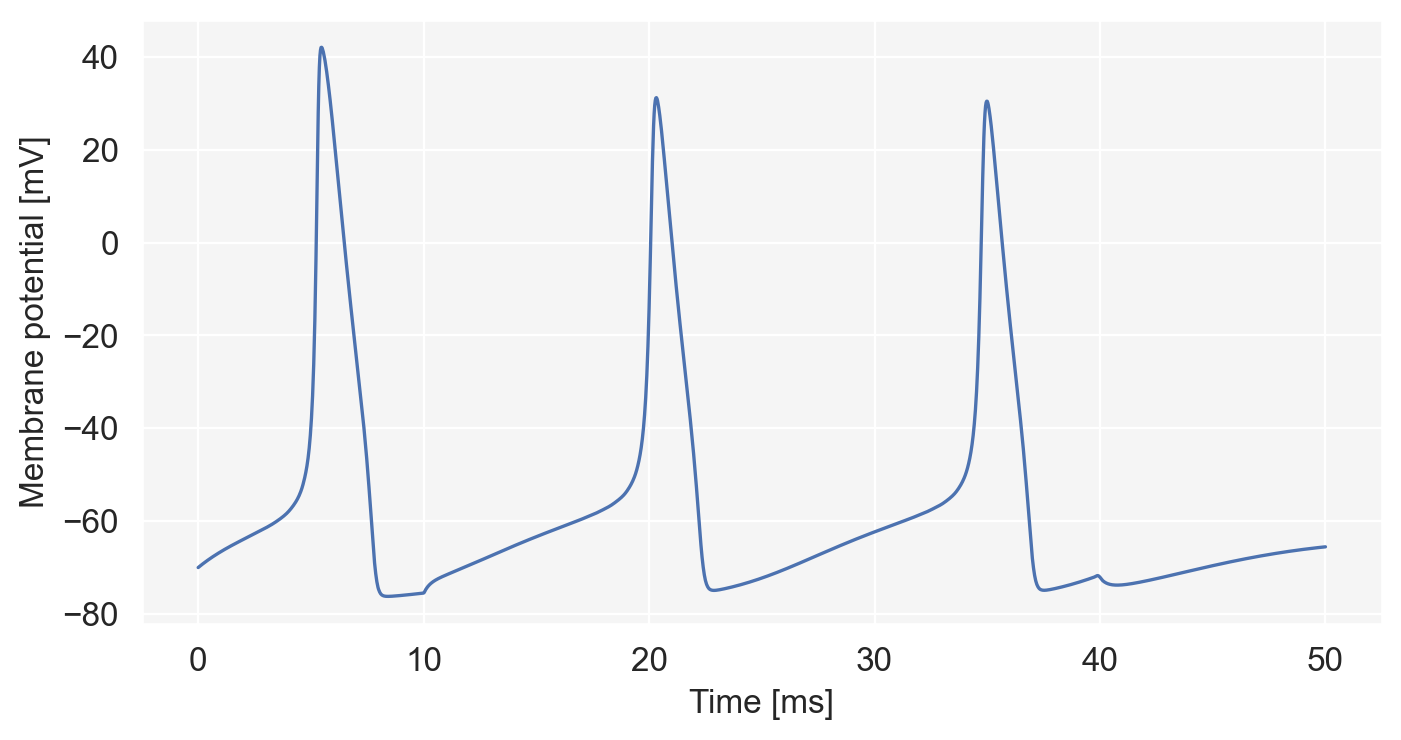

In [2]:
from pylfi.models import HodgkinHuxley

# Initialize the Hodgkin-Huxley system; model parameters can either be
# set in the constructor or accessed as class attributes:
hh = HodgkinHuxley(V_rest=-70)
hh.gbar_K = 36

# The simulation parameters needed are the simulation time ``T``, the time
# step ``dt``, and the input ``stimulus``, the latter either as a
# callable or ndarray with `shape=(int(T/dt)+1,)`:
T = 50.
dt = 0.025

def stimulus(t):
    return 10 if 10 <= t <= 40 else 0

# The system is solved by calling the class method ``solve`` and the
# solutions can be accessed as class attributes:
hh.solve(stimulus, T, dt)
t = hh.t
V = hh.V

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
ax.plot(t, V)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Membrane potential [mV]')
plt.show()

## HH Simulation 

Simulation with stimulus module from `pylfi`:

In [3]:
from pylfi.models import constant_stimulus

# simulation parameters
T = 50.
dt = 0.025
I_amp = 0.32
r_soma = 40
threshold = -55  # AP threshold

# input stimulus
stimulus = constant_stimulus(I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=40, r_soma=r_soma)
I = stimulus["I"]
I_stim = stimulus["I_stim"]
print(stimulus["info"])

Stimulus info
-------------
Stimulus type: step current
Available dictionary keys and values:
'I': (array) current per unit area [μA/cm**2]
'I_stim': (array) input current [nA]
'A_soma': (float) soma area [cm**2]
't': (array) time points
't_stim_on': (float) time when stimulus is turned on
't_stim_off': (float) time when stimulus is turned off
'duration': (float) duration of stimulus


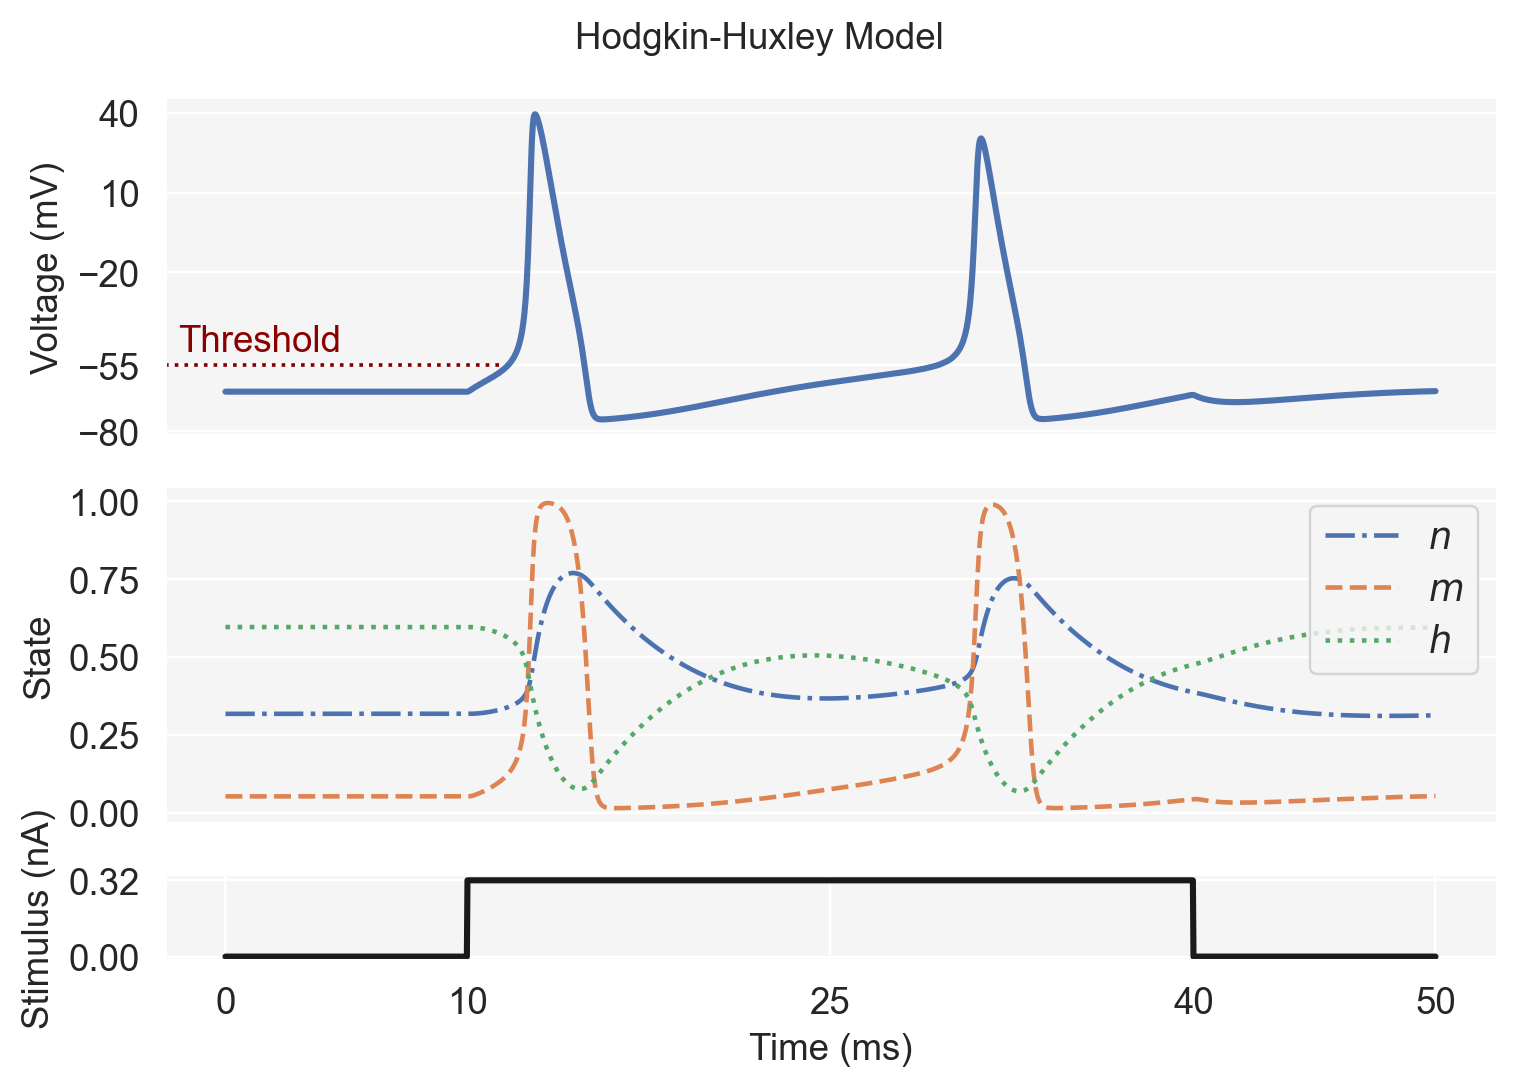

In [4]:
from pylfi.models import HodgkinHuxley

# HH simulation
hh = HodgkinHuxley()
hh.solve(I, T, dt)
t = hh.t
V = hh.V
n = hh.n
m = hh.m
h = hh.h

# remove top and right axis from plots
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# plot voltage trace
fig = plt.figure(figsize=(7, 5), tight_layout=True, dpi=110)
gs = gridspec.GridSpec(3, 1, height_ratios=[4, 4, 1])
ax = plt.subplot(gs[0])
plt.plot(t, V, lw=2)
plt.text(0.01, 0.25, 'Threshold', fontsize=12,
         color='darkred', transform=plt.gca().transAxes)
plt.axhline(threshold, xmax=0.253, ls=':', color='darkred')
plt.ylabel('Voltage (mV)')
ax.set_xticks([])
ax.set_yticks([-80, -55, -20, 10, 40])

ax = plt.subplot(gs[1])
plt.plot(t, n, '-.', lw=1.5, label='$n$')
plt.plot(t, m, "--", lw=1.5, label='$m$')
plt.plot(t, h, ls=':', lw=1.5, label='$h$')
plt.legend(loc='upper right')
plt.ylabel("State")
ax.set_xticks([])
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

ax = plt.subplot(gs[2])
plt.plot(t, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')

ax.set_xticks([0, 10, 25, 40, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Hodgkin-Huxley Model")
plt.show()

# Spiking Features <a name="features"></a>


`pylfi.features.SpikingFeatures` extracts spiking features of a voltage trace.


The following features are available:

* spike rate
* latency to first_spike
* average AP overshoot
* average AHP depth
* average AP width
* accommodation index 

Generate voltage trace:

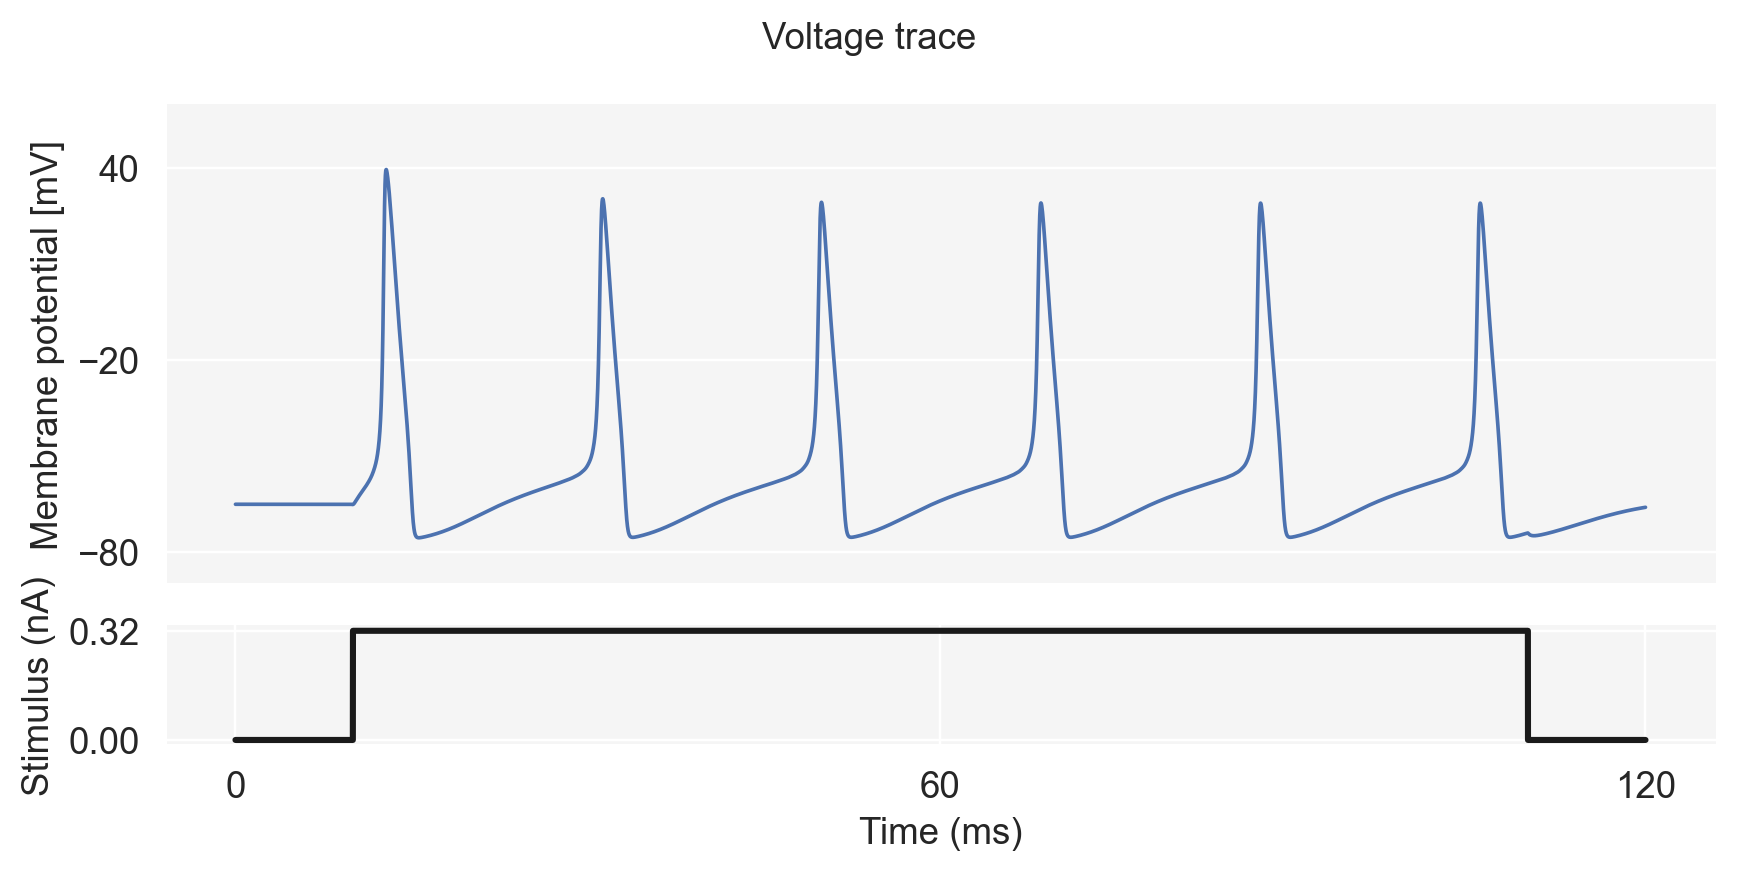

In [5]:
from pylfi.models import HodgkinHuxley, constant_stimulus

# simulation parameters
T = 120.
dt = 0.01
I_amp = 0.32  # 0.1 #0.31
r_soma = 40  # 15

# input stimulus
stimulus = constant_stimulus(I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=110, r_soma=r_soma)
I = stimulus["I"]
I_stim = stimulus["I_stim"]

# HH simulation
hh = HodgkinHuxley()
hh.solve(I, T, dt)
t = hh.t
V = hh.V

fig = plt.figure(figsize=(8, 4), tight_layout=True, dpi=110)
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

ax = plt.subplot(gs[0])

plt.plot(t, V)
#plt.set_xlabel('Time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.ylim(-90, 60)
ax.set_xticks([])
ax.set_yticks([-80, -20, 40])

ax = plt.subplot(gs[1])
plt.plot(t, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')
ax.set_xticks([0, np.max(t) / 2, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Voltage trace")
plt.show()

The basis for extracting the features is the identification of action potentials (APs). ``scipy.signal.find_peaks`` is used to find all peaks, i.e. APs, greater or equal than the set threshold.

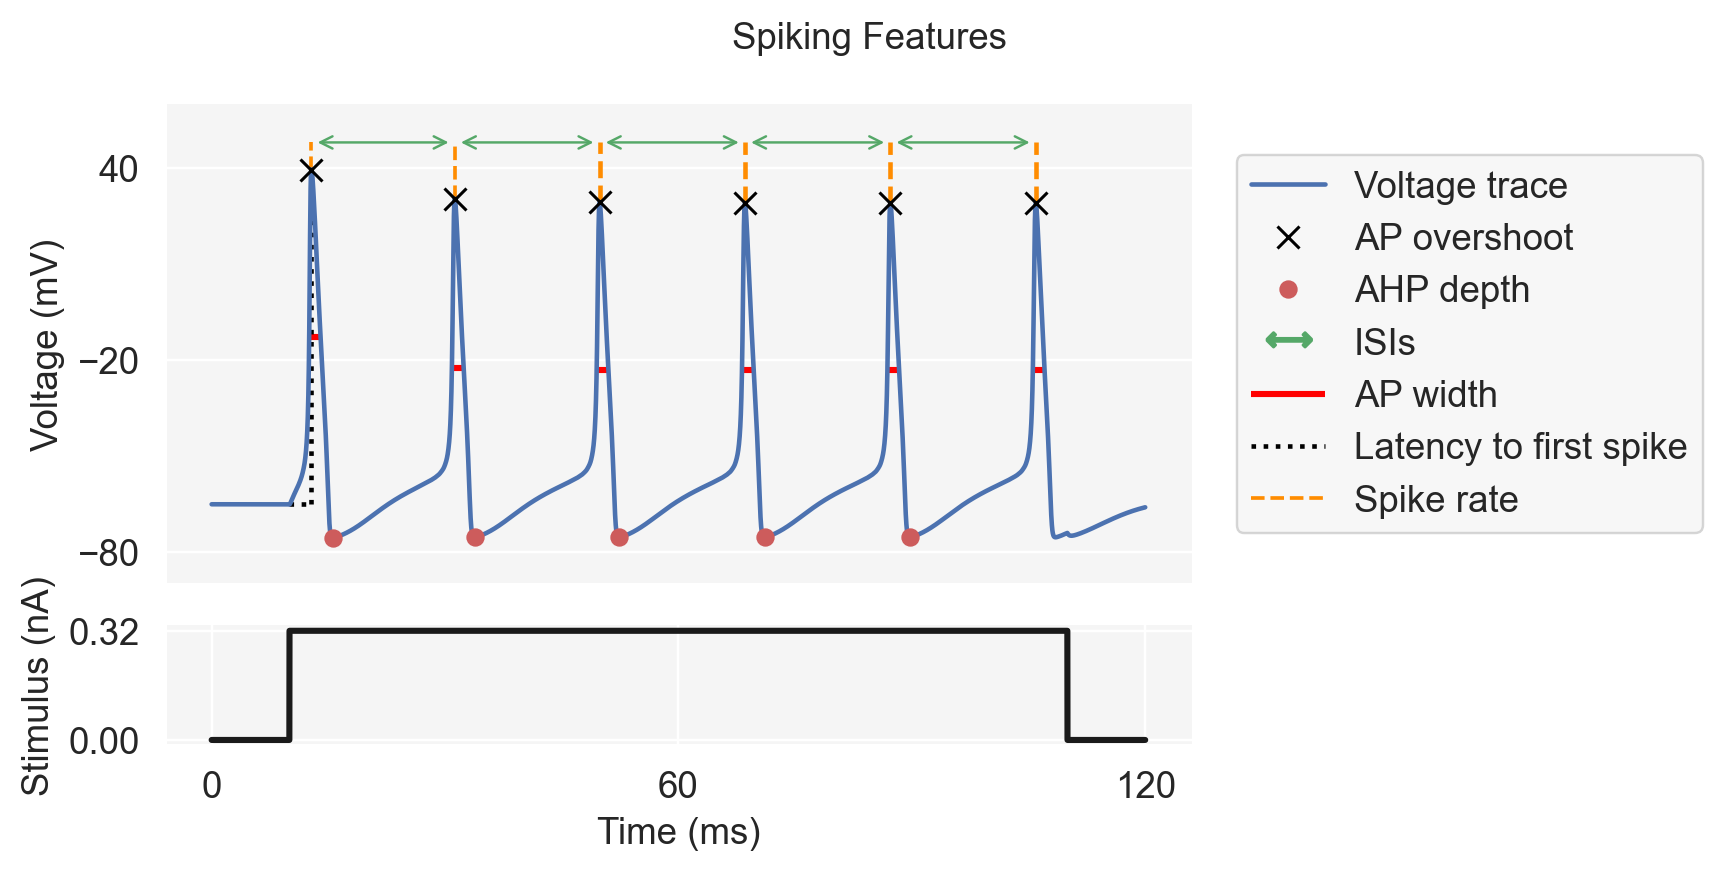

In [6]:
from pylfi.features import SpikingFeatures 

# find spikes
threshold = -55  # AP threshold
duration = stimulus["duration"]
t_stim_on = stimulus["t_stim_on"]

features = SpikingFeatures(V, t, duration, t_stim_on, threshold)

# plot voltage trace with features
spike_pos = features.spikes_position()
V_spikes_height = features.V_spikes_height()
width_lines = features.width_lines()
ahp_depth_pos = features.AHP_depth_position()

fig = plt.figure(figsize=(8, 4), tight_layout=True, dpi=110)
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
ax = plt.subplot(gs[0])

# voltage trace
plt.plot(t, V, lw=1.5, label='Voltage trace')

# AP overshoot
plt.plot(t[spike_pos], V[spike_pos], "x",
         ms=7, color='black', label='AP overshoot')

# AP widths
plt.hlines(*width_lines, color="red", lw=2, label='AP width')

# AHP depths
plt.plot(t[ahp_depth_pos], V[ahp_depth_pos], 'o',
         ms=5, color='indianred', label='AHP depth')

# latency to first spike
plt.hlines(hh.V_rest, t_stim_on,
           t[spike_pos[0]], color='black', lw=1.5, ls=":")
plt.vlines(t[spike_pos[0]], hh.V_rest, V_spikes_height[0],
           color='black', lw=1.5, ls=":", label="Latency to first spike")

# the marked ISIs are used to compute the accommodation index
# ISI arrow legend
plt.plot([], [], color='g', marker=r'$\longleftrightarrow$',
         linestyle='None', markersize=15, label='ISIs')

# ISI spike 1 -> 2
plt.vlines(t[spike_pos[0]], V[spike_pos[0]],
           48, color='darkorange', ls='--', label='Spike rate')
plt.annotate('', xy=(t[spike_pos[0]], 48), xycoords='data',
             xytext=(t[spike_pos[1]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 2 -> 3
plt.vlines(t[spike_pos[1]], V[spike_pos[1]],
           48, color='darkorange', ls='--')
plt.annotate('', xy=(t[spike_pos[1]], 48), xycoords='data',
             xytext=(t[spike_pos[2]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 3 -> 4
plt.vlines(t[spike_pos[2]], V[spike_pos[2]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[2]], 48), xycoords='data',
             xytext=(t[spike_pos[3]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 4 -> 5
plt.vlines(t[spike_pos[3]], V[spike_pos[3]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[3]], 48), xycoords='data',
             xytext=(t[spike_pos[4]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 5 -> 6
plt.vlines(t[spike_pos[4]], V[spike_pos[4]],
           48, color='darkorange', lw=1.5, ls='--')
plt.vlines(t[spike_pos[5]], V[spike_pos[5]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[4]], 48), xycoords='data',
             xytext=(t[spike_pos[5]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})

plt.ylabel('Voltage (mV)')
plt.ylim(-90, 60)
ax.set_xticks([])
ax.set_yticks([-80, -20, 40])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,
           labels,
           loc='center left',
           bbox_to_anchor=(1.04, 0.5),
           fancybox=True,
           borderaxespad=0.1,
           ncol=1
           )

ax = plt.subplot(gs[1])
plt.plot(t, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')
ax.set_xticks([0, np.max(t) / 2, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Spiking Features")
plt.show()

In [7]:
# number of spikes
n_spikes = features.n_spikes
print(f"{n_spikes=}")

# spike rate
spike_rate = features.spike_rate
print(f"{spike_rate=:.4f} mHz")

# latency to first spike
latency_to_first_spike = features.latency_to_first_spike
print(f"{latency_to_first_spike=:.4f} ms")

# average AP overshoot
average_AP_overshoot = features.average_AP_overshoot
print(f"{average_AP_overshoot=:.4f} mV")

# average AHP depth
average_AHP_depth = features.average_AHP_depth
print(f"{average_AHP_depth=:.4f} mV")

# average AP width
average_AP_width = features.average_AP_width
print(f"{average_AP_width=:.4f} mV")

# accommodation index
accommodation_index = features.accommodation_index
print(f"{accommodation_index=:.4f}")

n_spikes=6
spike_rate=0.0600 mHz
latency_to_first_spike=2.8300 ms
average_AP_overshoot=31.0688 mV
average_AHP_depth=-62.7855 mV
average_AP_width=0.8836 mV
accommodation_index=0.0005


# Parameter Inference

In [8]:
# simulation parameters
T = 120.
dt = 0.01
threshold = -55  # AP threshold
I_amp = 0.32
r_soma = 40

# input stimulus
stimulus = constant_stimulus(I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=110, r_soma=r_soma)
I = stimulus["I"]
I_stim = stimulus["I_stim"]
duration = stimulus["duration"]
t_stim_on = stimulus["t_stim_on"]

In [9]:
from pylfi.features import SpikingFeatures
from pylfi.models import HodgkinHuxley, constant_stimulus

# HH instance
hh = HodgkinHuxley()

def simulator(gbar_K, gbar_Na):
    """Simulator model, returns summary statistic"""
    
    # set model parameters
    hh.gbar_K = gbar_K 
    hh.gbar_Na = gbar_Na 
    
    # hh simulation
    hh.solve(I, T, dt)
    t = hh.t
    V = hh.V
    
    # extract features 
    features = SpikingFeatures(V, t, duration, t_stim_on, threshold)
    n_spikes = features.n_spikes
    
    spike_rate = features.spike_rate
    latency_to_first_spike = features.latency_to_first_spike
    average_AP_overshoot = features.average_AP_overshoot
    average_AHP_depth = features.average_AHP_depth
    average_AP_width = features.average_AP_width
    accommodation_index = features.accommodation_index
    
    sum_stats = np.array([
        spike_rate,
        latency_to_first_spike,
        average_AP_overshoot,
        average_AHP_depth,
        average_AP_width,
        accommodation_index
    ])
    
    return sum_stats

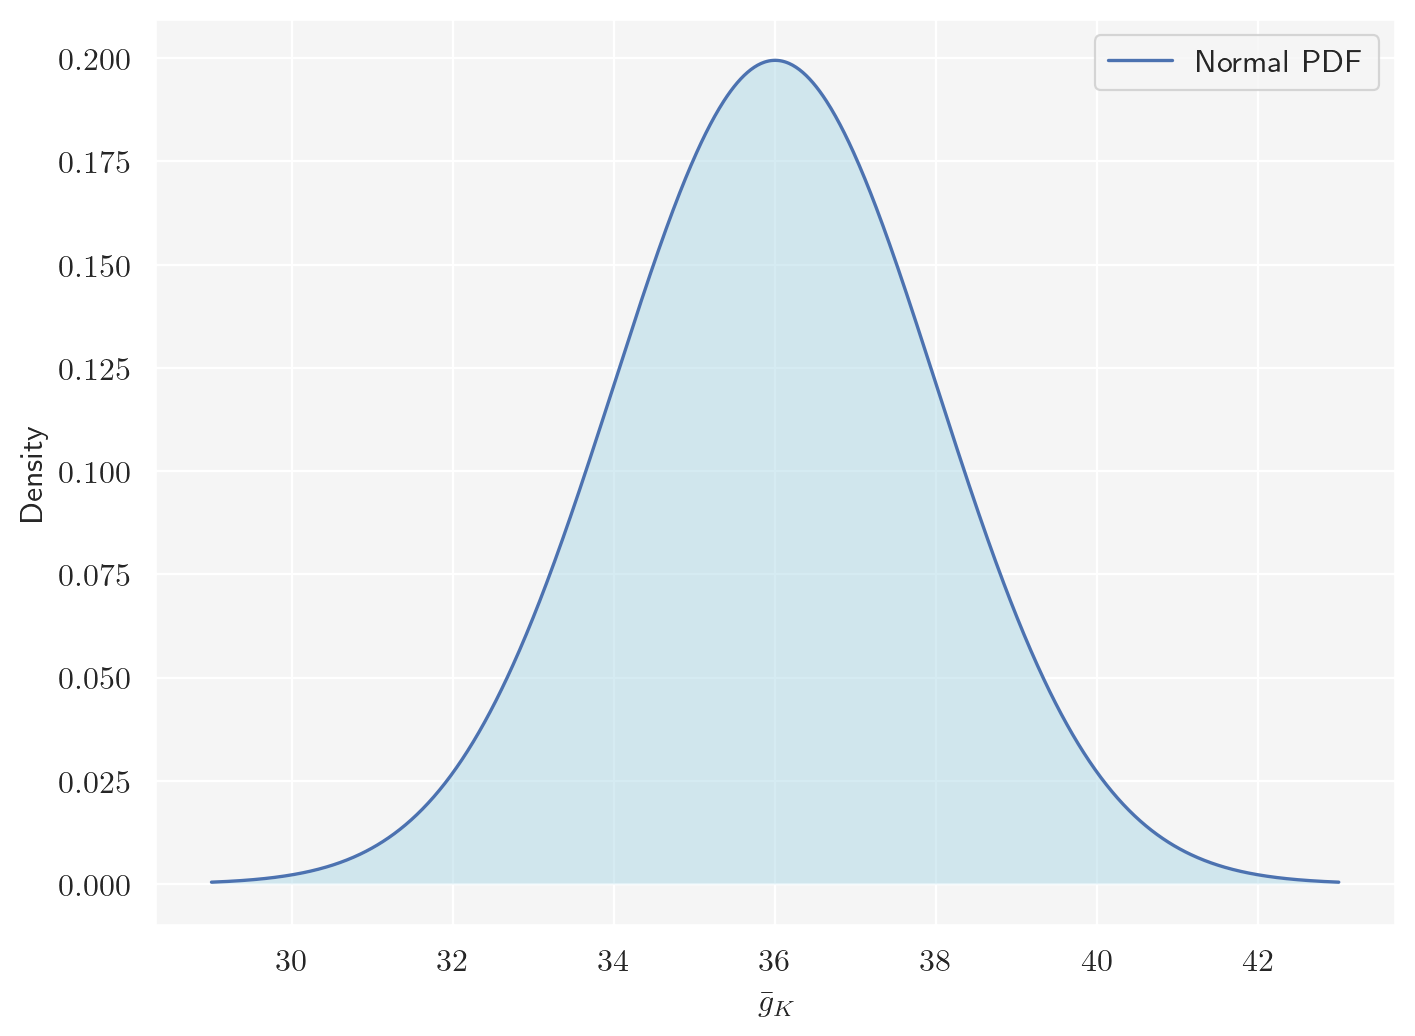

In [10]:
from pylfi.priors import Normal

gbar_K_prior = Normal(loc=36, scale=2, seed=42, name='gbar_K', tex=r'$\bar{g}_K$')

x = np.linspace(29, 43, 1000)
gbar_K_prior.plot_prior(x)
plt.show()

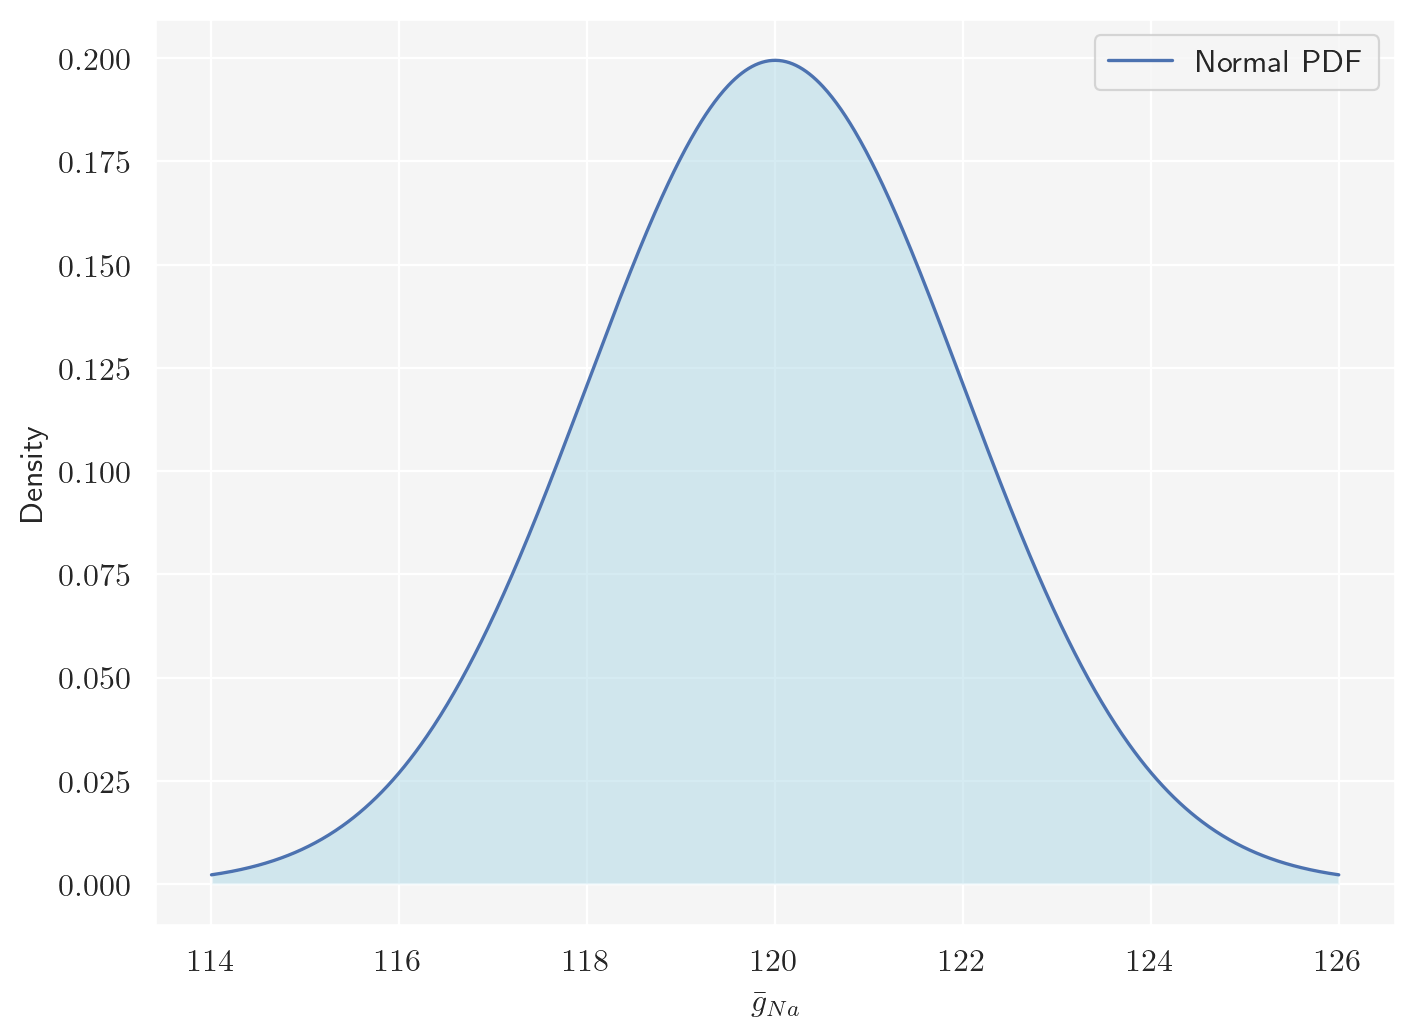

In [11]:
gbar_Na_prior = Normal(loc=120, scale=2, seed=42, name='gbar_Na', tex=r'$\bar{g}_{Na}$')
x = np.linspace(114, 126, 1000)
gbar_Na_prior.plot_prior(x)
plt.show()

In [12]:
from pylfi.inferences import RejectionABC

observation = simulator(gbar_K=36, gbar_Na=120)
priors = [gbar_K_prior, gbar_Na_prior]

# initialize sampler
sampler = RejectionABC(observation, simulator, priors, distance='l2')

# inference config
num_simulations = 100
epsilon = 1.0

# run inference
journal = sampler.sample(num_simulations, epsilon)

INFO:RejectionABC Initializing Rejection ABC inference scheme.
INFO:RejectionABC Running simulator with prior samples.


INFO:RejectionABC Sampling results written to journal.
INFO:RejectionABC Accepted 60 of 100 simulations.
INFO:Journal  Initializing post-sampling processing.


In [13]:
samples_gbar_K = journal.get_accepted_parameters["gbar_K"]
samples_gbar_Na = journal.get_accepted_parameters["gbar_Na"]

print(samples_gbar_K)

[35.72347139765763, 35.53169325055333, 35.53172608610164, 35.0610512281301, 35.073164614375074, 35.06854049285948, 32.1734395106844, 32.550164334973935, 34.875424941518055, 33.97433775933115, 34.18395184895758, 33.17539259732942, 35.54844739902693, 36.13505640937585, 33.15050362757309, 34.91123455094964, 36.22184517941973, 33.6980128451554, 34.79872262016239, 35.41661250041345, 34.79658677554121, 35.973005550524135, 33.8845781420882, 33.558312700057954, 32.08065975224045, 33.34362790220314, 35.76870343522352, 35.39779260882142, 33.04295601926515, 34.560311583210584, 35.07872245808043, 32.47391968927453, 35.22983543916737, 34.646155999388085, 34.32156495355472, 35.38157524829757, 35.04165152430942, 35.62868204667237, 33.787330051987944, 33.60758675183866, 35.85597975683933, 34.709760490789755, 35.928347921780095, 30.76050979182051, 36.17409413647634, 35.401985299068265, 36.183521553071, 32.024862170798215, 35.56065622432497, 34.9634595634527, 34.38301279421363, 34.99648591283093, 34.940

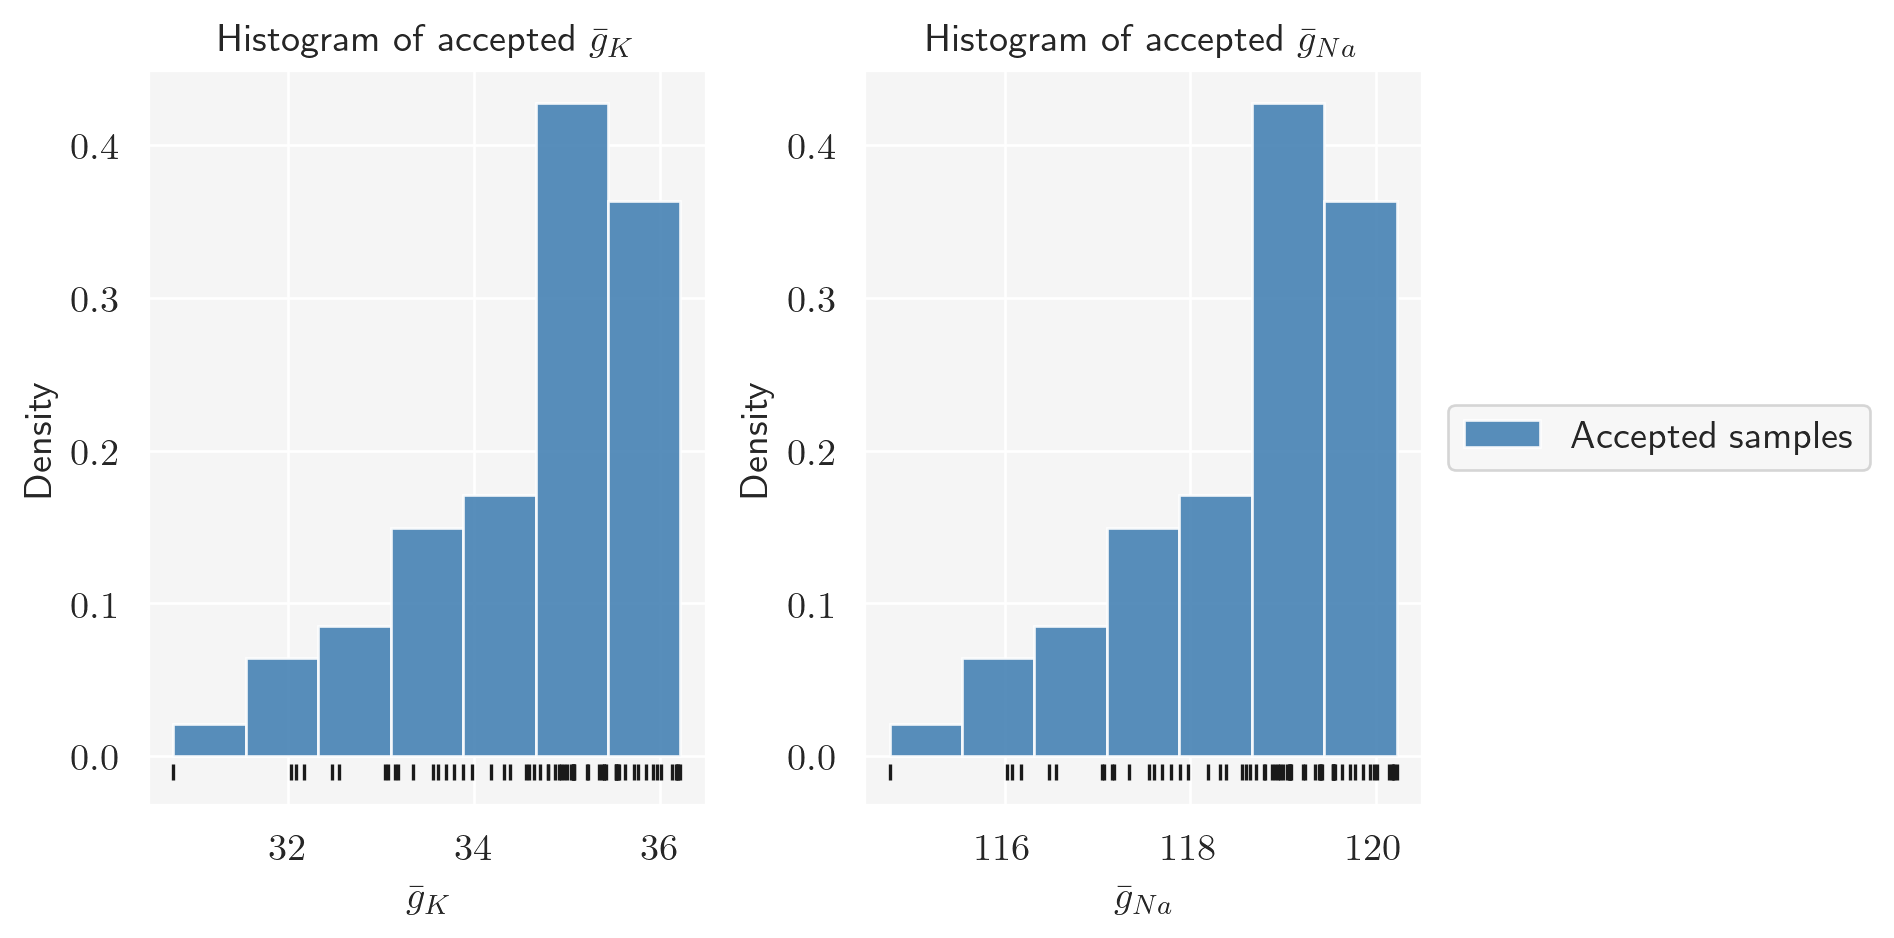

In [14]:
true_parameter_values = [36, 120]
journal.histplot(bins='knuth',
                 figsize=(8, 4),
                 rug=True,
                 plot_style='pylfi',
                 #true_parameter_values=true_parameter_values,
                 )

# Correlation

In [ ]:
T = 120.
dt = 0.025
t_stim_on = 10
t_stim_off = 110
duration = t_stim_off - t_stim_on
hh = HodgkinHuxley()

N = 20

def stimulus(t):
    return 10 if t_stim_on <= t <= t_stim_off else 0


def corr_simulator(gbar_K, feature='spike_rate'):
    hh.gbar_K = gbar_K
    hh.solve(stimulus, T, dt)
    t = hh.t
    V = hh.V
    #features = SpikingFeatures(V, t, duration, t_stim_on)
   # sum_stat = getattr(features, feature)

    # extract features 
    features = SpikingFeatures(V, t, duration, t_stim_on, threshold)
    n_spikes = features.n_spikes
    
    spike_rate = features.spike_rate
    latency_to_first_spike = features.latency_to_first_spike
    average_AP_overshoot = features.average_AP_overshoot
    average_AHP_depth = features.average_AHP_depth
    average_AP_width = features.average_AP_width
    accommodation_index = features.accommodation_index
    
    sum_stats = np.array([
        spike_rate,
        latency_to_first_spike,
        average_AP_overshoot,
        average_AHP_depth,
        average_AP_width,
        accommodation_index
    ])
    
    return t, V, n_spikes, spike_rate, latency_to_first_spike, average_AP_overshoot, average_AHP_depth, average_AP_width, accommodation_index



thetas = np.linspace(30, 40, N)
spike_rates = []
latencies = []
overshoot = []
depth = []
width = []
acc_index = []

cols = 2
rows = int(np.ceil(N / cols))
fig = plt.figure(figsize=(8, 30), constrained_layout=True)
gs = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for index, theta in enumerate(thetas):
    ax = fig.add_subplot(gs[index]) 
    t, V, n_spikes, sr, la, ov, dp, wd, ai = corr_simulator(theta)
    ax.plot(t, V) 
   
    textstr = '\n'.join((
        r'num spikes = %d' % (n_spikes),
        r'spike rate = %.3f' % (sr),
        r'latency = %.3f' % (la),
        r'overshoot = %.3f' % (ov),
        r'depth = %.3f' % (dp),
        r'width = %.3f' % (wd),
        r'ai = %.3f' % (ai),
    ))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    spike_rates.append(sr)
    latencies.append(la)
    overshoot.append(ov)
    depth.append(dp)
    width.append(wd)
    acc_index.append(ai)

plt.show()

[[ 7.00000000e-02  2.66000000e+00  3.55708463e+01 -6.44056114e+01
   1.00370129e+00 -6.55093351e-05]
 [ 7.00000000e-02  2.74000000e+00  3.53800455e+01 -6.44261092e+01
   1.01487400e+00 -1.29785853e-04]
 [ 7.00000000e-02  2.61000000e+00  3.51811352e+01 -6.44457842e+01
   1.00432352e+00 -6.42467074e-05]
 [ 7.00000000e-02  2.63000000e+00  3.49585096e+01 -6.44644562e+01
   1.00705484e+00 -6.35930048e-05]
 [ 7.00000000e-02  2.65000000e+00  3.47217837e+01 -6.44824214e+01
   1.01161164e+00 -6.29128657e-05]
 [ 7.00000000e-02  2.74000000e+00  3.44688044e+01 -6.44996823e+01
   1.01186052e+00  0.00000000e+00]
 [ 7.00000000e-02  2.68000000e+00  3.41326897e+01 -6.45159989e+01
   1.02329322e+00  4.36183386e-17]
 [ 6.00000000e-02  2.71000000e+00  3.40453629e+01 -6.27420223e+01
   8.90873493e-01 -7.56429652e-05]
 [ 6.00000000e-02  2.72000000e+00  3.36821347e+01 -6.27560918e+01
   8.91772794e-01  2.64409805e-17]
 [ 6.00000000e-02  2.76000000e+00  3.32518491e+01 -6.27689433e+01
   8.98503241e-01 -7.3035

ValueError: x and y must be the same size

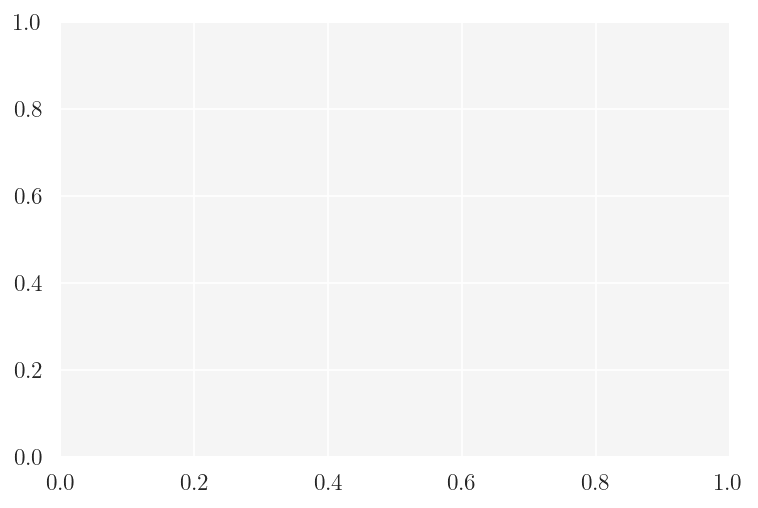

In [17]:
N = 20
thetas = np.linspace(30, 40, N)
sum_stats = np.array([simulator(theta, 120) for theta in thetas])
print(sum_stats)
plt.scatter(thetas, sum_stats)
#plt.scatter(sum_stats, thetas)
plt.show()